# 12. 모평균 비교에 관한 가설검정: One way ANOVA

In [42]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [43]:
df = pd.read_csv('../../ref_files/csv_file/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [45]:
stat, p = f_oneway(df.loc[df['color'] == 'E', 'price'],
                   df.loc[df['color'] == 'I', 'price'],
                   df.loc[df['color'] == 'J', 'price'])
round(stat, 3), round(p, 3)

(621.846, 0.0)

In [46]:
bike = pd.read_csv('../../ref_files/csv_file/bike.csv')
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [47]:
model = ols(formula='temp ~ season', data=bike).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
season,1.0,44221.657301,44221.657301,780.591754,5.879560e-166
Residual,10884.0,616594.417651,56.651453,NaN,NaN


In [48]:
model = ols(formula='temp ~ C(season)', data=bike).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,412885.270005,137628.423335,6040.687453,0.0
Residual,10882.0,247930.804947,22.783570,NaN,NaN


# 13. 모평균 비교에 관한 가설검정: Two way ANOVA

In [49]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [50]:
df = pd.read_csv('../../ref_files/csv_file/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [51]:
formula = 'price ~ cut + color + cut : color'
model = ols(formula, data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
cut,4.0,1.104175e+10,2.760436e+09,181.405097,1.095733e-154
color,6.0,2.550704e+10,4.251174e+09,279.370558,0.000000e+00
cut:color,24.0,1.653455e+09,6.889396e+07,4.527442,1.000780e-12
Residual,53905.0,8.202709e+11,1.521697e+07,NaN,NaN


# 14. 모분산 비교에 관한 가설검정: 등분산 검정(F-test of equality of variances)

In [52]:
import pandas as pd
from scipy.stats import f
from scipy.stats import bartlett
from scipy.stats import levene

In [53]:
df = pd.read_csv('../../ref_files/csv_file/financial_info_10k_persons.csv')
df.head()

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65
2,3,0,57,F,2,Uneducated,Single,$40K - $60K,Silver,36,6,3,0,19482.0,1421,22
3,4,0,57,F,2,Doctorate,Single,Less than $40K,Blue,44,2,2,3,9149.0,14401,100
4,5,0,63,F,1,Uneducated,Single,Unknown,Blue,55,4,3,1,16312.0,4366,68


In [54]:
ser_M = df.loc[df['Gender'] == 'M', "Period_m"]
ser_F = df.loc[df['Gender'] == 'F', "Period_m"]

In [55]:
ser_M.head()

1     29
6     42
10    51
21    56
23    36
Name: Period_m, dtype: int64

In [56]:
ser_F.head()

0    36
2    36
3    44
4    55
5    34
Name: Period_m, dtype: int64

In [57]:
F = ser_M.var() / ser_F.var()
F

1.0404263453173155

In [58]:
result = f.cdf(F, dfd = len(ser_M) - 1, dfn = len(ser_F))
result

0.9187893064994331

In [59]:
p = (1 - result) * 2
p

0.16242138700113373

In [60]:
bartlett(ser_F, ser_M)

BartlettResult(statistic=1.9563015878338914, pvalue=0.16190940989175842)

In [61]:
levene(ser_F, ser_M)

LeveneResult(statistic=2.4640198991740747, pvalue=0.11651198398605053)

In [62]:
stat, p = levene(ser_F, ser_M)
stat

2.4640198991740747

# 15. 범주형 변수 간의 독립성 검정(Chi-squared test)

In [63]:
import pandas as pd
from scipy.stats import chi2_contingency

In [64]:
df = pd.read_csv('../../ref_files/csv_file/financial_info_10k_persons.csv')
df.head()

,ID,is_attrited,Age,Gender,Dependent_cnt,Edu_level,Marital_status,Income,Card,Period_m,Total_rel_cnt,Inactive_last_12m,Contacts_cnt_last_12m,Credit_limit,Total_trans_amt,Total_trans_cnt
0,1,0,41,F,2,High School,Married,Less than $40K,Blue,36,6,2,2,4953.0,4183,67
1,2,0,38,M,0,High School,Single,$80K - $120K,Blue,29,3,3,2,5983.0,4141,65
2,3,0,57,F,2,Uneducated,Single,$40K - $60K,Silver,36,6,3,0,19482.0,1421,22
3,4,0,57,F,2,Doctorate,Single,Less than $40K,Blue,44,2,2,3,9149.0,14401,100
4,5,0,63,F,1,Uneducated,Single,Unknown,Blue,55,4,3,1,16312.0,4366,68


In [65]:
chi2_contingency(pd.crosstab(df['Gender'], df['Marital_status']))

Chi2ContingencyResult(statistic=4.093468963560284, pvalue=0.25154644757396555, dof=3, expected_freq=array([[ 392.8524, 2462.9028, 2067.3924,  392.8524],
       [ 346.1476, 2170.0972, 1821.6076,  346.1476]]))

# 16. 시계열 분석

In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('../../ref_files/csv_file/seoul_subway.csv')
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204
2,20191201,1호선,종로5가,13716,13149,20191204
3,20191201,1호선,동대문,11040,13079,20191204
4,20191201,1호선,신설동,8498,8322,20191204


In [68]:
df_sub = df.loc[(df['노선명'] == '1호선') & (df['역명'] == '종로3가')]
df_sub

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
1,20191201,1호선,종로3가,19646,17772,20191204
593,20191202,1호선,종로3가,34277,32405,20191205
1184,20191203,1호선,종로3가,34957,32832,20191206
1776,20191204,1호선,종로3가,36007,33498,20191207
2426,20191205,1호선,종로3가,35536,33702,20191208
...,...,...,...,...,...,...
214078,20201126,1호선,종로3가,22732,20713,20201129
215074,20201127,1호선,종로3가,22295,20639,20201130
215172,20201128,1호선,종로3가,15104,14240,20201201
216253,20201129,1호선,종로3가,8974,8215,20201202


In [69]:
df_sub['MA_5'] = df_sub['승차총승객수'].rolling(window=5).mean()
df_sub.head()

C:\Users\jinre\AppData\Local\Temp\ipykernel_20172\2618728798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['MA_5'] = df_sub['승차총승객수'].rolling(window=5).mean()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,MA_5
1,20191201,1호선,종로3가,19646,17772,20191204,NaN
593,20191202,1호선,종로3가,34277,32405,20191205,NaN
1184,20191203,1호선,종로3가,34957,32832,20191206,NaN
1776,20191204,1호선,종로3가,36007,33498,20191207,NaN
2426,20191205,1호선,종로3가,35536,33702,20191208,32084.6


In [70]:
df_sub['EWMA_01'] = df_sub['승차총승객수'].ewm(alpha=0.1).mean()
df_sub.head()

C:\Users\jinre\AppData\Local\Temp\ipykernel_20172\816633524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['EWMA_01'] = df_sub['승차총승객수'].ewm(alpha=0.1).mean()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,MA_5,EWMA_01
1,20191201,1호선,종로3가,19646,17772,20191204,NaN,19646.000000
593,20191202,1호선,종로3가,34277,32405,20191205,NaN,27346.526316
1184,20191203,1호선,종로3가,34957,32832,20191206,NaN,30154.819188
1776,20191204,1호선,종로3가,36007,33498,20191207,NaN,31856.529224
2426,20191205,1호선,종로3가,35536,33702,20191208,32084.6,32755.034944


In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [72]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204
2,20191201,1호선,종로5가,13716,13149,20191204
3,20191201,1호선,동대문,11040,13079,20191204
4,20191201,1호선,신설동,8498,8322,20191204


In [73]:
df = df.set_index('사용일자')
df.head()

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
20191201,1호선,종각,19093,17141,20191204
20191201,1호선,종로3가,19646,17772,20191204
20191201,1호선,종로5가,13716,13149,20191204
20191201,1호선,동대문,11040,13079,20191204
20191201,1호선,신설동,8498,8322,20191204


In [74]:
df_sub = df.loc[(df['노선명'] == '1호선') & (df['역명'] == '종각')]
df_sub

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
20191201,1호선,종각,19093,17141,20191204
20191202,1호선,종각,48153,46770,20191205
20191203,1호선,종각,49696,47715,20191206
20191204,1호선,종각,49877,48664,20191207
20191205,1호선,종각,51426,49816,20191208
...,...,...,...,...,...
20201126,1호선,종각,30870,30073,20201129
20201127,1호선,종각,30432,29121,20201130
20201128,1호선,종각,12280,11753,20201201


In [75]:
df_sub = df_sub.reset_index()
df_sub.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191202,1호선,종각,48153,46770,20191205
2,20191203,1호선,종각,49696,47715,20191206
3,20191204,1호선,종각,49877,48664,20191207
4,20191205,1호선,종각,51426,49816,20191208


In [76]:
df_sub['사용일자'] = pd.to_datetime(df_sub['사용일자'], format='%Y%m%d')
df_sub.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2019-12-01,1호선,종각,19093,17141,20191204
1,2019-12-02,1호선,종각,48153,46770,20191205
2,2019-12-03,1호선,종각,49696,47715,20191206
3,2019-12-04,1호선,종각,49877,48664,20191207
4,2019-12-05,1호선,종각,51426,49816,20191208


In [77]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    366 non-null    datetime64[ns]
 1   노선명     366 non-null    object        
 2   역명      366 non-null    object        
 3   승차총승객수  366 non-null    int64         
 4   하차총승객수  366 non-null    int64         
 5   등록일자    366 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 17.3+ KB


In [79]:
df_sub = df_sub.set_index('사용일자')
df_sub.head()

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
2019-12-01,1호선,종각,19093,17141,20191204
2019-12-02,1호선,종각,48153,46770,20191205
2019-12-03,1호선,종각,49696,47715,20191206
2019-12-04,1호선,종각,49877,48664,20191207
2019-12-05,1호선,종각,51426,49816,20191208


In [80]:
result = seasonal_decompose(df_sub['승차총승객수'])
result

c:\Users\jinre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.tight_layout()
c:\Users\jinre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.tight_layout()
c:\Users\jinre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.tight_layout()
c:\Users\jinre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.tight_layout()
c:\Users\jinre\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.

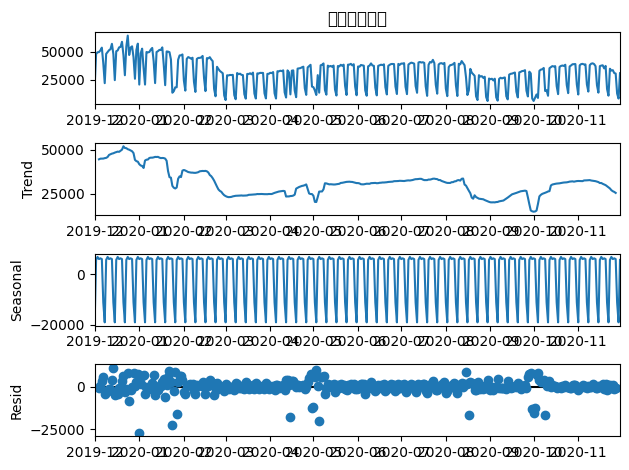

C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  func(*args, **kwargs)
C:\Users\jinre\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)


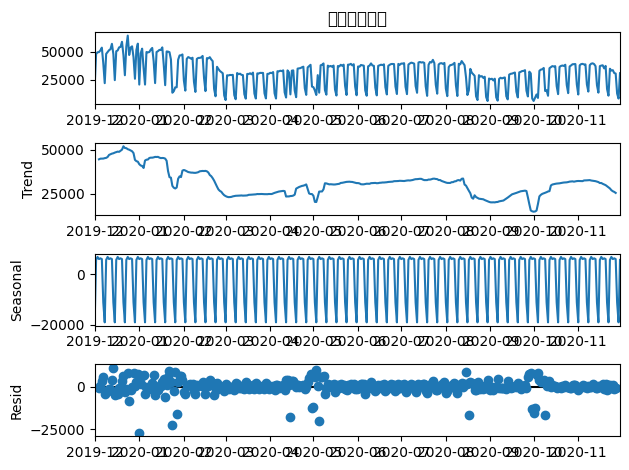

In [81]:
result.plot()

In [82]:
result.trend

사용일자
2019-12-01             NaN
2019-12-02             NaN
2019-12-03             NaN
2019-12-04    44560.142857
2019-12-05    44932.000000
                  ...     
2020-11-26    26103.000000
2020-11-27    25525.285714
2020-11-28             NaN
2020-11-29             NaN
2020-11-30             NaN
Name: trend, Length: 366, dtype: float64

# 17. 상관분석

In [83]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [86]:
df = pd.read_csv('../../ref_files/csv_file/bike.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [87]:
df.corr()

C:\Users\jinre\AppData\Local\Temp\ipykernel_20172\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [88]:
df[['casual', 'registered', 'count']].corr()

,casual,registered,count
casual,1.000000,0.497250,0.690414
registered,0.497250,1.000000,0.970948
count,0.690414,0.970948,1.000000


In [90]:
df[['casual', 'registered', 'count']].corr(method='spearman')

,casual,registered,count
casual,1.000000,0.775785,0.847378
registered,0.775785,1.000000,0.988901
count,0.847378,0.988901,1.000000


In [92]:
pearsonr(df['casual'], df['registered'])

PearsonRResult(statistic=0.49724968508700823, pvalue=0.0)

# 18. 계층적 군집분석(Hierarchical Clustering)

In [93]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [94]:
df = pd.read_csv('../../ref_files/csv_file/iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
df_sub = df.iloc[:, :-1]
df_sub.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [97]:
model = AgglomerativeClustering(n_clusters=3).fit(df_sub)

In [98]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [99]:
df['cluster'] = model.labels_
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [100]:
pd.crosstab(df['Species'], df['cluster'])

cluster,0,1,2
Species,,,
setosa,0,50,0
versicolor,49,0,1
virginica,15,0,35


In [101]:
df.groupby('cluster').mean().reset_index()

C:\Users\jinre\AppData\Local\Temp\ipykernel_20172\3616762780.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean().reset_index()


,cluster,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0,5.920312,2.751562,4.420312,1.434375
1,1,5.006000,3.428000,1.462000,0.246000
2,2,6.869444,3.086111,5.769444,2.105556


In [103]:
link = linkage(df_sub, method='ward')
link

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

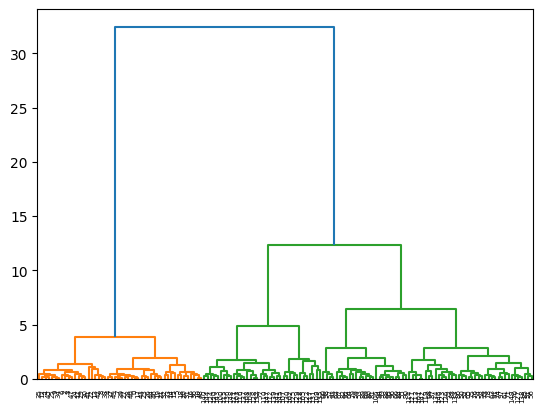

In [104]:
plt.figure()
dendrogram(link)
plt.show()

# 19. 비계층적 군집분석(K-means Clustering)

In [105]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [106]:
df = pd.read_csv('../../ref_files/csv_file/iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [111]:
df_1 = df.head()
df_2 = df.tail(1)

In [108]:
nor_minmax = MinMaxScaler().fit(df_1.iloc[:, :-1])
nor_minmax

MinMaxScaler()

In [112]:
nor_minmax.transform(df_1.iloc[:, :-1])

array([[1.        , 0.83333333, 0.5       , 0.        ],
       [0.6       , 0.        , 0.5       , 0.        ],
       [0.2       , 0.33333333, 0.        , 0.        ],
       [0.        , 0.16666667, 1.        , 0.        ],
       [0.8       , 1.        , 0.5       , 0.        ]])

In [113]:
nor_minmax.transform(df_2.iloc[:, :-1])

array([[ 2.6,  0. , 19. ,  1.6]])

In [114]:
model = KMeans(n_clusters=3, random_state=123).fit(df.iloc[:, :-1])

c:\Users\jinre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [115]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [116]:
model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [118]:
df['cluster'] = model.labels_
df.groupby('cluster').mean()

C:\Users\jinre\AppData\Local\Temp\ipykernel_20172\2782694840.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
cluster,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871


# 20. 단순 회귀분석(Simple Linear Regression)

In [119]:
import pandas as pd
from statsmodels.formula.api import ols

In [120]:
df = pd.read_csv('../../ref_files/csv_file/iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# model = ols(formula='Sepal.Length ~ Sepal.Width', data=df).fit()

In [121]:
df.columns = ['SL', 'SW', 'PL', 'PW', 'species']
df.head()

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [122]:
model = ols(formula='SL ~ SW', data=df).fit()
model

In [123]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SL   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.152
Time:                        16:06:15   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5262      0.479     13.628      0.000       5.580       7.473
SW            -0.2234      0.155     -1.440      0.152      -0.530       0.083
==============================================================================
Omnibus:                        4.389   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.237
Skew:                           0.360   Prob(JB):                        0.120
Kurtosis:                       2.600   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
model = ols(formula='PL ~ PW', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PL   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           4.68e-86
Time:                        16:07:05   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0836      0.073     14.850      0.000       0.939       1.228
PW             2.2299      0.051     43.387      0.000       2.128       2.332
==============================================================================
Omnibus:                        2.438   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.966
Skew:                           0.211   Prob(JB):                        0.374
Kurtosis:                       3.369   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
df['pred'] = model.predict(df)
df.head()

,SL,SW,PL,PW,species,pred
0,5.1,3.5,1.4,0.2,setosa,1.529546
1,4.9,3.0,1.4,0.2,setosa,1.529546
2,4.7,3.2,1.3,0.2,setosa,1.529546
3,4.6,3.1,1.5,0.2,setosa,1.529546
4,5.0,3.6,1.4,0.2,setosa,1.529546


In [127]:
from sklearn.linear_model import LinearRegression

In [130]:
model = LinearRegression().fit(X = df[['PL']], y = df[['PW']])
model

LinearRegression()

In [131]:
model.coef_

array([[0.41575542]])

In [132]:
model.intercept_

array([-0.36307552])

In [133]:
model.predict(df[['PL']])

array([[0.21898206],
       [0.21898206],
       [0.17740652],
       [0.2605576 ],
       [0.21898206],
       [0.34370869],
       [0.21898206],
       [0.2605576 ],
       [0.21898206],
       [0.2605576 ],
       [0.2605576 ],
       [0.30213314],
       [0.21898206],
       [0.09425544],
       [0.13583098],
       [0.2605576 ],
       [0.17740652],
       [0.21898206],
       [0.34370869],
       [0.2605576 ],
       [0.34370869],
       [0.2605576 ],
       [0.0526799 ],
       [0.34370869],
       [0.42685977],
       [0.30213314],
       [0.30213314],
       [0.2605576 ],
       [0.21898206],
       [0.30213314],
       [0.30213314],
       [0.2605576 ],
       [0.2605576 ],
       [0.21898206],
       [0.2605576 ],
       [0.13583098],
       [0.17740652],
       [0.21898206],
       [0.17740652],
       [0.2605576 ],
       [0.17740652],
       [0.17740652],
       [0.17740652],
       [0.30213314],
       [0.42685977],
       [0.21898206],
       [0.30213314],
       [0.218

In [134]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [135]:
mean_absolute_error(y_true=df['PL'], y_pred=df['PW'])

2.558666666666667

In [136]:
mean_squared_error(y_true=df['PL'], y_pred=df['PW']) ** 0.5

2.76504370067937

# 21. 다중 회귀분석(Multiple Linear Regression)

In [1]:
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [2]:
df = pd.read_csv('../../ref_files/csv_file/bike.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df_sub = df.loc[:, 'season' : 'casual']
df_sub.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual
0,1,0,0,1,9.84,14.395,81,0.0,3
1,1,0,0,1,9.02,13.635,80,0.0,8
2,1,0,0,1,9.02,13.635,80,0.0,5
3,1,0,0,1,9.84,14.395,75,0.0,3
4,1,0,0,1,9.84,14.395,75,0.0,0


In [7]:
formula = 'casual ~ ' + ' + '.join(df_sub.columns[:-1])
y, X = dmatrices(formula, data=df_sub, return_type='dataframe')

In [8]:
y.head()

,casual
0,3.0
1,8.0
2,5.0
3,3.0
4,0.0


In [13]:
X.head()

,Intercept,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1.0,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0
1,1.0,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0
2,1.0,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0
3,1.0,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0
4,1.0,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0


In [11]:
df_vif = pd.DataFrame()
df_vif['colname'] = X.columns
df_vif['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
df_vif

,colname,VIF
0,Intercept,34.029472
1,season,1.137211
2,holiday,1.069731
3,workingday,1.071196
4,weather,1.236150
5,temp,35.516012
6,atemp,35.550831
7,humidity,1.425034
8,windspeed,1.195704


In [15]:
df_sub = pd.concat([df.loc[:, 'season' : 'temp'],
                   df.loc[:, 'humidity' : 'casual']], 
                   axis = 1)
df_sub.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual
0,1,0,0,1,9.84,81,0.0,3
1,1,0,0,1,9.02,80,0.0,8
2,1,0,0,1,9.02,80,0.0,5
3,1,0,0,1,9.84,75,0.0,3
4,1,0,0,1,9.84,75,0.0,0


In [16]:
formula = 'casual ~ ' + ' + '.join(df_sub.columns[:-1])
y, X = dmatrices(formula, data=df_sub, return_type='dataframe')

df_vif = pd.DataFrame()
df_vif['colname'] = X.columns
df_vif['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
df_vif

,colname,VIF
0,Intercept,31.375118
1,season,1.136866
2,holiday,1.068094
3,workingday,1.070025
4,weather,1.235251
5,temp,1.089028
6,humidity,1.421256
7,windspeed,1.149650


In [18]:
df.corr().round(2)

C:\Users\jinre\AppData\Local\Temp\ipykernel_28324\1524431984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10,0.16,0.16
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.04,-0.02,-0.01
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.32,0.12,0.01
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.14,-0.11,-0.13
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47,0.32,0.39
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46,0.31,0.39
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.35,-0.27,-0.32
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.09,0.09,0.10
casual,0.10,0.04,-0.32,-0.14,0.47,0.46,-0.35,0.09,1.00,0.50,0.69
registered,0.16,-0.02,0.12,-0.11,0.32,0.31,-0.27,0.09,0.50,1.00,0.97


In [20]:
df_dum = pd.get_dummies(df, columns=['season'], drop_first=True)
df_dum.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40,0,0,0
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,32,0,0,0
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,13,0,0,0
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1,0,0,0
